In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 4060 Laptop GPU


In [1]:
import shutil

shutil.rmtree('checkpoints/stopmotion_cyclegan', ignore_errors=True)


In [3]:
!python train.py --dataroot ./datasets/stopmotion \
                 --name stopmotion_cyclegan \
                 --model cycle_gan \
                 --gpu_ids 0 \
                 --n_epochs 50 \
                 --n_epochs_decay 50 \
                 --save_epoch_freq 10 \
                 --display_freq 100 \
                 --print_freq 100

^C


In [2]:
!python train.py --dataroot ./datasets/stopmotion \
                 --name stopmotion_cyclegan \
                 --model cycle_gan \
                 --gpu_ids 0 \
                 --n_epochs 10 \
                 --n_epochs_decay 10 \
                 --save_epoch_freq 1 \
                 --display_freq 100 \
                 --print_freq 100

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/stopmotion         	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
             display_freq: 100                           	[default: 400]
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
                 gan_mode: lsgan                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        

C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable 

In [5]:
import os, subprocess, sys, shlex, pathlib

repo_dir = r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix"
dataroot = os.path.join(repo_dir, "datasets", "stopmotion")
exp_name = "stopmotion_cyclegan"
epoch = "latest"     
gpu_ids = "0"        
num_test = "1000"    


os.chdir(repo_dir)
print("CWD:", os.getcwd())

cmd = f'python test.py --dataroot "{dataroot}" --name {exp_name} --model cycle_gan --phase test --epoch {epoch} --num_test {num_test} --gpu_ids {gpu_ids}'
print("Running:", cmd)
proc = subprocess.run(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
print(proc.stdout)


CWD: C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix
Running: python test.py --dataroot "C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\datasets\stopmotion" --name stopmotion_cyclegan --model cycle_gan --phase test --epoch latest --num_test 1000 --gpu_ids 0
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
W0808 01:23:08.199000 17364 site-packages\torch\_logging\_internal.py:1081] [0/0] Profiler function <class 'torch.autograd.profiler.record_function'> will be ignored
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
 

testA images: 55, testB images: 55
CWD: C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix
Running: python test.py --dataroot "C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\datasets\stopmotion" --name stopmotion_cyclegan --model cycle_gan --phase test --epoch latest --num_test 1000 --gpu_ids 0
C:\Users\yalda\anaconda3\envs\cyclegan_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix\datasets\stopmoti

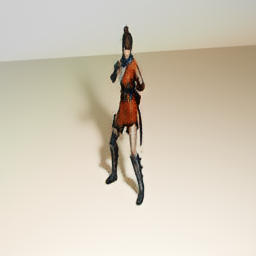

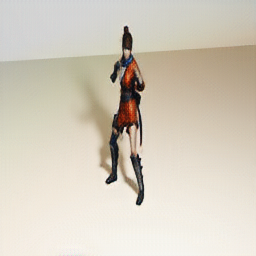

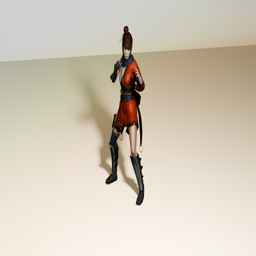

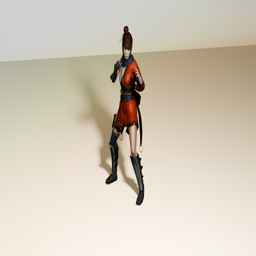

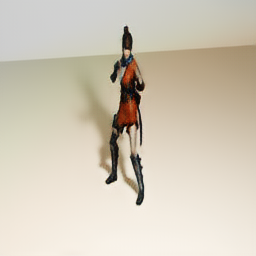

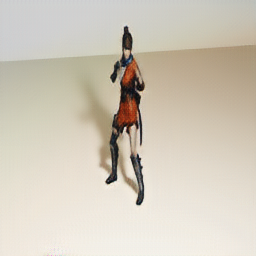

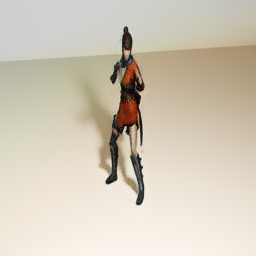

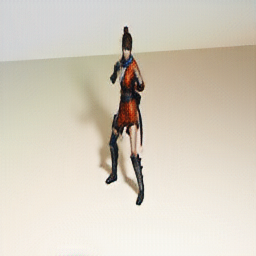

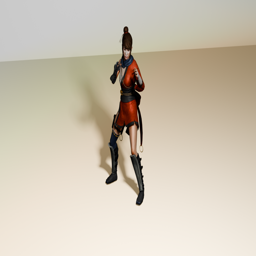

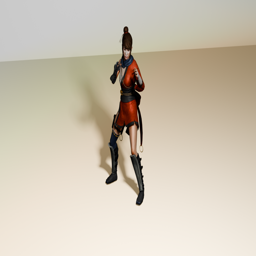

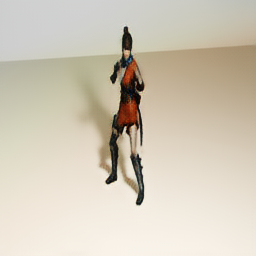

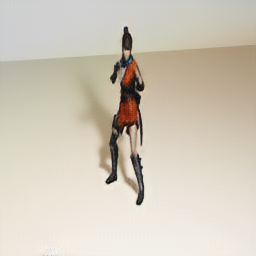

In [1]:
import os, subprocess, shlex, glob
from pathlib import Path
from PIL import Image
from IPython.display import display

repo_dir = r"C:\Users\yalda\OneDrive\Desktop\Thesis apps\Project Folder\pytorch-CycleGAN-and-pix2pix"
dataroot = str(Path(repo_dir) / "datasets" / "stopmotion")
exp_name = "stopmotion_cyclegan"
epoch = "latest"      
gpu_ids = "0"        
num_test = "1000"

testA = Path(dataroot) / "testA"
testB = Path(dataroot) / "testB"
nA = len(list(testA.glob("*.*"))) if testA.exists() else 0
nB = len(list(testB.glob("*.*"))) if testB.exists() else 0
print(f"testA images: {nA}, testB images: {nB}")
if nA == 0:
    raise SystemExit("No images found in testA. Add some test inputs first.")
if nB == 0:
    print("WARNING: testB is empty. CycleGAN's unaligned loader expects both A and B.\n"
          "Add at least 1 image to testB to avoid ZeroDivisionError.")

cmd = f'python test.py --dataroot "{dataroot}" --name {exp_name} --model cycle_gan --phase test --epoch {epoch} --num_test {num_test} --gpu_ids {gpu_ids}'
print("CWD:", repo_dir)
print("Running:", cmd)

env = os.environ.copy()
env["TORCHDYNAMO_DISABLE"] = "1"
env["TORCHINDUCTOR_DISABLE"] = "1"


proc = subprocess.run(shlex.split(cmd), cwd=repo_dir, env=env,
                      stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
print(proc.stdout)

results_dir = Path(repo_dir) / "results" / exp_name / f"test_{epoch}"
img_dir = results_dir / "images"
if img_dir.exists():
    imgs = sorted(img_dir.glob("*.png"))[:12]
    if imgs:
        print(f"Showing {len(imgs)} image(s) from:", img_dir)
        for p in imgs:
            display(Image.open(p))
    else:
        print("No PNGs found in:", img_dir)
else:
    print("Results folder not found yet:", results_dir)


In [2]:
import os
import shutil
from pathlib import Path


In [3]:
base_dir = Path("results/stopmotion_cyclegan/test_latest/images")  
output_base = Path("organized_results")
suffixes = ["real_A", "fake_B", "rec_A", "real_B", "fake_A", "rec_B"]

for suffix in suffixes:
    target_dir = output_base / suffix
    target_dir.mkdir(parents=True, exist_ok=True)

    for img_file in base_dir.glob(f"*_{suffix}.png"):
        shutil.copy(img_file, target_dir / img_file.name)

print("✅ Images organized into separate folders!")


✅ Images organized into separate folders!
